In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D, LeakyReLU
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
# Define the model architecture
shape = 160
input_layer = Input(shape=(shape, shape, 3))
conv_layer_1 = Conv2D(filters=32, kernel_size=(3, 3))(input_layer)
activation_layer_1 = LeakyReLU(alpha=0.1)(conv_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(activation_layer_1)
pooling_layer_1 = MaxPool2D(pool_size=(2, 2))(dropout_layer_1)
conv_layer_2 = Conv2D(filters=64, kernel_size=(3, 3))(pooling_layer_1)
activation_layer_2 = LeakyReLU(alpha=0.1)(conv_layer_2)
dropout_layer_2 = Dropout(rate=0.2)(activation_layer_2)
pooling_layer_2 = MaxPool2D(pool_size=(2, 2))(dropout_layer_2)
conv_layer_3 = Conv2D(filters=128, kernel_size=(3, 3))(pooling_layer_2)
activation_layer_3 = LeakyReLU(alpha=0.1)(conv_layer_3)
dropout_layer_3 = Dropout(rate=0.2)(activation_layer_3)
pooling_layer_3 = MaxPool2D(pool_size=(2, 2))(dropout_layer_3)
conv_layer_4 = Conv2D(filters=256, kernel_size=(3, 3))(pooling_layer_3)
activation_layer_4 = LeakyReLU(alpha=0.1)(conv_layer_4)
dropout_layer_4 = Dropout(rate=0.2)(activation_layer_4)
pooling_layer_4 = MaxPool2D(pool_size=(2, 2))(dropout_layer_4)
conv_layer_5 = Conv2D(filters=512, kernel_size=(3, 3))(pooling_layer_4)
activation_layer_5 = LeakyReLU(alpha=0.1)(conv_layer_5)
dropout_layer_5 = Dropout(rate=0.2)(activation_layer_5)
pooling_layer_5 = MaxPool2D(pool_size=(2, 2))(dropout_layer_5)
flatten_layer = Flatten()(pooling_layer_5)
dense_layer_1 = Dense(units=1024)(flatten_layer)
activation_layer_6 = LeakyReLU(alpha=0.1)(dense_layer_1)
dropout_layer_6 = Dropout(rate=0.2)(activation_layer_6)
output_layer = Dense(units=4, activation='softmax')(dropout_layer_6)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

In [3]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 158, 158, 32)      0         
                                                                 
 dropout (Dropout)           (None, 158, 158, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                             

In [5]:
N = 1600
x_train = np.zeros((N, shape, shape, 3), 'float')
y_train = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/train"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/train", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/train", class_label, image_file))
        im = cv2.resize(im, (shape, shape))
        x_train[count, :, :, :] = im / 255.
        y_train[count] = i
        count += 1

y_train = to_categorical(y_train)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

N2 = 200
x_valid = np.zeros((N2, shape, shape, 3), 'float')
y_valid = np.zeros((N2), 'float')

count2 = 0
class_labels = sorted(os.listdir("Dataset/val"))
for j, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/val", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/val", class_label, image_file))
        im = cv2.resize(im, (shape, shape))
        x_valid[count2, :, :, :] = im / 255.
        y_valid[count2] = j
        count2 += 1

y_valid = to_categorical(y_valid)
print('x_valid', x_valid.shape)
print('y_valid', y_valid.shape)

x_train (1600, 160, 160, 3)
y_train (1600, 4)
x_valid (200, 160, 160, 3)
y_valid (200, 4)


In [6]:
# Train Model
h = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
25/25 [==============================] - 53s 2s/step - loss: 1.3496 - accuracy: 0.3313 - val_loss: 1.3312 - val_accuracy: 0.4700
Epoch 2/50
25/25 [==============================] - 50s 2s/step - loss: 1.2220 - accuracy: 0.4625 - val_loss: 1.2540 - val_accuracy: 0.5150
Epoch 3/50
25/25 [==============================] - 49s 2s/step - loss: 1.0888 - accuracy: 0.5437 - val_loss: 1.1710 - val_accuracy: 0.6100
Epoch 4/50
25/25 [==============================] - 50s 2s/step - loss: 0.9642 - accuracy: 0.6237 - val_loss: 1.1055 - val_accuracy: 0.6050
Epoch 5/50
25/25 [==============================] - 48s 2s/step - loss: 0.8903 - accuracy: 0.6381 - val_loss: 1.0636 - val_accuracy: 0.6300
Epoch 6/50
25/25 [==============================] - 47s 2s/step - loss: 0.8453 - accuracy: 0.6656 - val_loss: 1.0274 - val_accuracy: 0.6750
Epoch 7/50
25/25 [==============================] - 47s 2s/step - loss: 0.7492 - accuracy: 0.7100 - val_loss: 0.9756 - val_accuracy: 0.6650
Epoch 8/50
25/25 [==

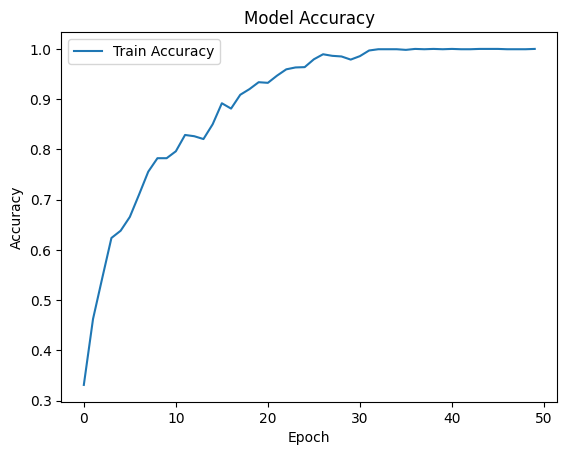

In [21]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy'], loc='upper left')
plt.show()

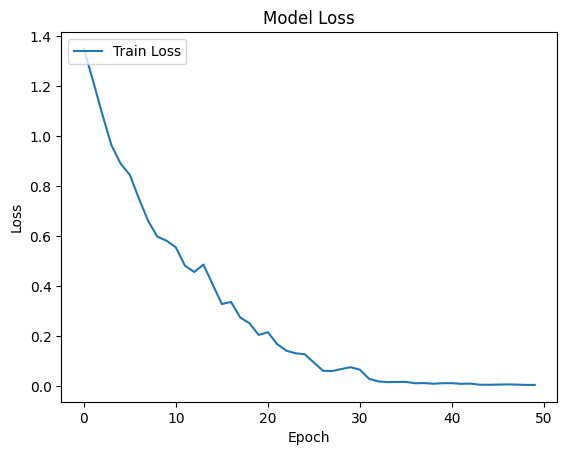

In [22]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss'], loc='upper left')
plt.show()

model.save('my_model.h5')

In [23]:
N = 200
x_test = np.zeros((N, shape, shape, 3), 'float')
y_test = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/test"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/test", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/test", class_label, image_file), cv2.IMREAD_COLOR)
        im = cv2.resize(im, (shape, shape))
        x_test[count] = im / 255.
        y_test[count] = i
        count += 1

y_test = to_categorical(y_test)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_test (200, 160, 160, 3)
y_test (200, 4)


In [24]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Get the class predictions and confidence scores
class_preds = y_pred.argmax(axis=1)
confidences = np.max(y_pred, axis=-1)

# Define the class names
class_names = ['B', 'D', 'R', 'S']

# Define the test data directory
test_dir = 'Dataset/test/'

test_images = []
for class_folder in os.listdir(test_dir):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_file in os.listdir(class_folder_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(class_folder_path, image_file)
                test_images.append(image_path)


7/7 [==============================] - 1s 154ms/step


In [25]:
# Save the predictions to a file
with open('predictions.txt', 'w') as f:
    for i in range(len(test_images)):
        image_name = os.path.basename(test_images[i])
        class_name = class_names[class_preds[i]]
        confidence = confidences[i]
        f.write("{}: ,{}\n".format(
            image_name, class_name))

In [26]:
# Evaluate model on test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy*100)

7/7 [==============================] - 1s 153ms/step - loss: 0.5341 - accuracy: 0.8150
Test loss: 0.5341264605522156
Test accuracy: 81.49999976158142


In [27]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), class_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[40  1  2  7]
 [ 0 40  4  6]
 [ 0  3 45  2]
 [ 3  5  4 38]]
